In [18]:
# 🚢 Titanic Survival Prediction – Machine Learning Project.

# 📌 Project Objective
# The objective of this project is to predict whether a passenger survived the Titanic disaster using Logistic Regression, following a complete end-to-end machine learning workflow.

# 📌 Steps Performed:
# 1).Loaded and explored the Titanic dataset
# 2).Handled missing values (age → median, embarked → mode)
# 3).Removed irrelevant and redundant columns
# 4).Encoded categorical variables (sex, embarked)
# 5).Performed feature engineering:
#     FamilySize, IsAlone, FamilyType
#     Log-transformed fare
#     Created age groups
# 6).Split data into training and testing sets (with stratification)
# 7).Applied feature scaling using StandardScaler
# 8).Built a baseline model using DummyClassifier
# 9).Trained a Logistic Regression model
# 10).Evaluated performance using accuracy, precision, recall, F1-score
# 11).Visualized results using a confusion matrix

# Result:
# The Logistic Regression model performed significantly better than the baseline and demonstrated effective feature engineering and preprocessing.

# Tools & Techniques:
# Pandas, NumPy, Scikit-learn, Matplotlib,
# Logistic Regression, Feature Engineering, Model Evaluation

In [19]:
import pandas as pd
import numpy as np

# Load Titanic dataset
df = pd.read_csv("output.csv")

In [20]:
print(df.head())
print(df.isnull().sum())     
print(df.describe())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

In [21]:
df_fill = df.fillna({
    "age" : df["age"].median(),
    "embarked" : df["embarked"].mode()[0],
},inplace=True)

df.drop("deck",axis=1,inplace=True)
df.drop("class",axis=1,inplace=True)
df.drop("alive",axis=1,inplace=True)
df.drop("embark_town",axis=1,inplace=True)
df.drop("alone",axis=1,inplace=True)
df.drop("adult_male",axis=1,inplace=True)
df.drop("who",axis=1,inplace=True)

In [22]:
print(df.head())
print(df.describe())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0

In [23]:
order = {
    'male' : 0,
    'female' : 1
}
df['sex'] = df['sex'].map(order)
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [24]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FareLog'] = np.log1p(df['fare'])

In [25]:
def age_group(age):
    if age < 13:
        return "child"
    elif age < 50:
        return "adult"
    else:
        return "old"

df["Age_group"] = df["age"].apply(age_group)
df["Age_group"] = df["Age_group"].map({"child" : 0,"adult" : 1,"old" : 2})  

In [26]:
def family_type(size):
    if size == 1:
        return 0  
    elif size <= 4:
        return 1  
    else:
        return 2  

df['FamilyType'] = df['FamilySize'].apply(family_type)
df.drop(['sibsp','parch','fare','age'], axis=1, inplace=True)
print(df.head())

   survived  pclass  sex  embarked_Q  embarked_S  FamilySize  IsAlone  \
0         0       3    0       False        True           2        0   
1         1       1    1       False       False           2        0   
2         1       3    1       False        True           1        1   
3         1       1    1       False        True           2        0   
4         0       3    0       False        True           1        1   

    FareLog  Age_group  FamilyType  
0  2.110213          1           1  
1  4.280593          1           1  
2  2.188856          1           0  
3  3.990834          1           1  
4  2.202765          1           0  


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [29]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train_scaled, y_train)
baseline_acc = baseline.score(X_test_scaled, y_test)
print("Baseline Accuracy:", baseline_acc)

Baseline Accuracy: 0.6145251396648045


In [30]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.8044692737430168
Precision: 0.7741935483870968
Recall: 0.6956521739130435
F1: 0.732824427480916


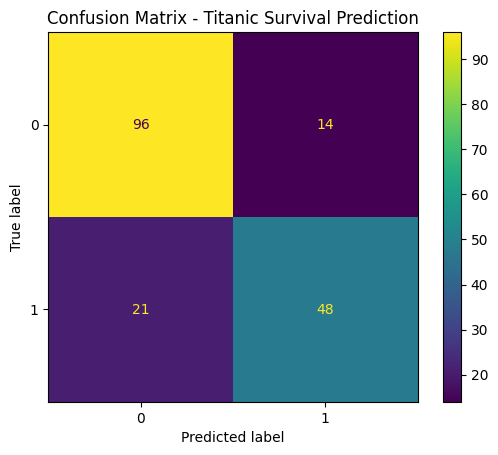

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Titanic Survival Prediction")
plt.show()

In [32]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

      Feature  Coefficient
1         sex     1.274315
6     FareLog     0.403157
2  embarked_Q     0.108271
4  FamilySize     0.017195
3  embarked_S    -0.126095
7   Age_group    -0.559280
0      pclass    -0.662749
5     IsAlone    -1.038703
8  FamilyType    -1.417585


Precision: 0.6829268292682927
Recall: 0.8115942028985508


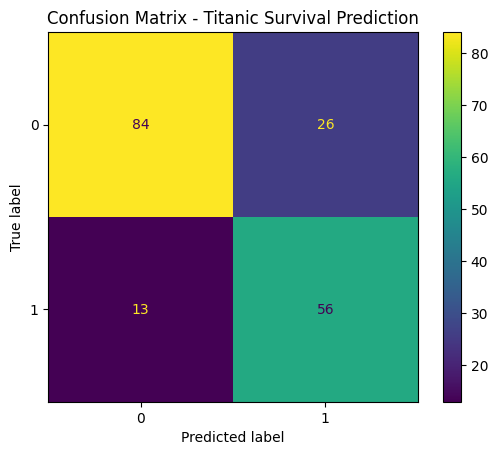

In [33]:
custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Titanic Survival Prediction")
plt.show()

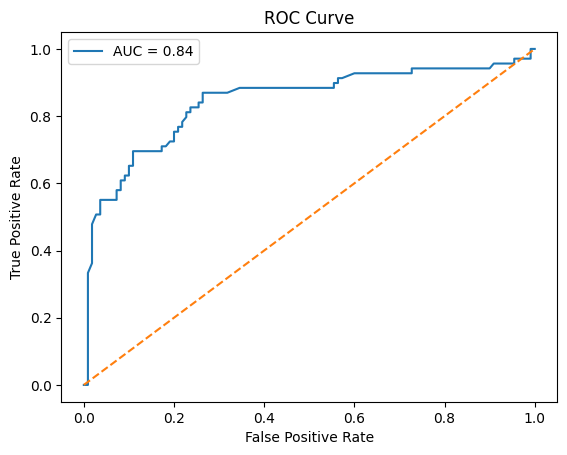

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()